In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r"E:\Data science\DataHack\Skillenza\Stage 2 Level 1\data.csv")
sub = pd.read_csv(r"E:\Data science\DataHack\Skillenza\Stage 2 Level 1\submission_format.csv")

In [3]:
data.head()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
0,1,0,1,66278,3989,1,Con,Shenavan
1,2,0,0,64701,7076,1,Alphonso,Shubenka
2,3,1,1,28045,5659,1,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,Margot,Pakxong
4,5,0,0,67479,9894,0,Denice,Ardazubre


In [4]:
data.shape

(2000, 8)

In [5]:
data.describe(include = 'all')

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1788,983
top,NaN,NaN,NaN,NaN,NaN,NaN,Bryn,Longquan
freq,NaN,NaN,NaN,NaN,NaN,NaN,4,4
mean,1000.500000,0.499500,0.501000,60217.760000,5477.723500,0.506000,NaN,NaN
std,577.494589,0.500125,0.500124,22785.967626,2610.025884,0.500089,NaN,NaN
min,1.000000,0.000000,0.000000,20007.000000,1001.000000,0.000000,NaN,NaN
25%,500.750000,0.000000,0.000000,40280.000000,3186.250000,0.000000,NaN,NaN
50%,1000.500000,0.000000,1.000000,60632.000000,5396.500000,1.000000,NaN,NaN
75%,1500.250000,1.000000,1.000000,80037.750000,7774.250000,1.000000,NaN,NaN


In [6]:
data.nunique()

Person_ID           2000
Own_House              2
Own_vehicle            2
Monthly_Salary      1974
Standard_Savings    1802
Bank_Debts             2
Name                1788
Area                 983
dtype: int64

In [7]:
data.isnull().sum()

Person_ID           0
Own_House           0
Own_vehicle         0
Monthly_Salary      0
Standard_Savings    0
Bank_Debts          0
Name                0
Area                0
dtype: int64

In [8]:
data.drop(columns = ['Person_ID','Name','Area'],inplace = True)

In [44]:
kmeans_data = KMeans(n_clusters = 4)

In [45]:
kmeans_data.fit(data)

KMeans(n_clusters=4)

In [46]:
pd.DataFrame(kmeans_data.cluster_centers_)

,0,1,2,3,4
0,0.453280,0.495030,30471.121272,5377.751491,0.499006
1,0.535714,0.513889,70204.121032,5449.748016,0.478175
2,0.498982,0.486762,50495.077393,5565.828921,0.545825
3,0.509960,0.507968,89507.143426,5519.806773,0.501992


In [30]:
set(kmeans_data.labels_)

{0, 1, 2, 3}

In [22]:
ssd = []
for k in range(1,8):
    kmeans_data1 = KMeans(n_clusters = k)
    kmeans_data1.fit(data)
    a = kmeans_data1.fit(data).score(data)
    ssd.append(a)

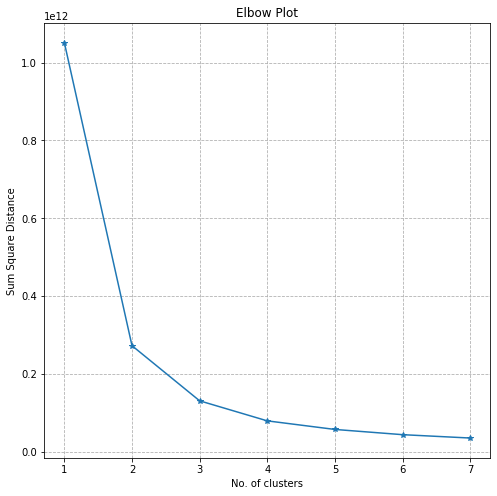

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
aa = np.absolute(ssd)
abc = [1,2,3,4,5,6,7]
plt.plot(abc , aa , marker ='*')
plt.xlabel('No. of clusters')
plt.ylabel('Sum Square Distance')
plt.title('Elbow Plot')
plt.grid(linestyle='--')

## Submission

In [47]:
sub.drop(columns = ['Groups'] , inplace = True)
sub['Groups'] = pd.Series(kmeans_data.labels_)

In [48]:
sub.head(10)

,Person_ID,Groups
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1
5,6,1
6,7,3
7,8,3
8,9,3
9,10,2


In [49]:
excel = pd.ExcelWriter('Kmeans3.xlsx')
sub.to_excel(excel)
excel.save()